<a href="https://colab.research.google.com/github/bongomarcel/CERI_Pandas/blob/main/Lecture_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pandas

A high-level overview of the [Pandas](https://pandas.pydata.org) library.

We will cover the following in this crash course:
1. Key data structures and indexing
2. Working with columns and sorting
3. Groupby.agg & Groupby.filter paradigms
4. Merging data

Also provided are:
1. Self-study: How to write efficient Pandas code
2. Practical (+Memo) on all the above

---
## Reading in DataFrames from Files

In [13]:
#! git clone https://github.com/bongomarcel/CERI_Pandas.git
! git pull

remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 5), reused 4 (delta 1), pack-reused 0
Unpacking objects: 100% (10/10), 495.66 KiB | 1.30 MiB/s, done.
From https://github.com/bongomarcel/CERI_Pandas
   8f155fb..e7a4c48  main       -> origin/main
Updating 8f155fb..e7a4c48
Fast-forward
 Lecture_Notebook.ipynb | 618 +++++++++++++++++++++----------------------------
 slides/slide05.pdf     | Bin 297741 -> 0 bytes
 slides/slide05.png     | Bin 0 -> 510626 bytes
 3 files changed, 266 insertions(+), 352 deletions(-)
 delete mode 100644 slides/slide05.pdf
 create mode 100644 slides/slide05.png


In [2]:
#%matplotlib inline
#import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import pandas as pd

Pandas has a number of very useful file reading tools `pd.re*`.
* pd.read_json()
* pd.read_table()
* pd.read_xml()
* pd.read_sql()
* pd.read_html()

In [3]:
%pwd

'/content'

In [4]:
%cd CERI_Pandas

/content/CERI_Pandas


In [8]:
! pip install pdf2image

In [12]:
elections = pd.read_csv("./data/elections.csv")
elections # if we end a cell with an expression or variable name, the result will print

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


In [30]:
from IPython.display import HTML
from base64 import b64encode

def show_image(path_to_image, width=800, height=350):
    img = open(path_to_image.lower(), 'rb').read()
    data_url = 'data:image/png;base64,' + b64encode(img).decode()
    display(HTML("<img src='%s' %s%s>" % (data_url, "width='%d'" % (width), "height='%d'" % (height))))


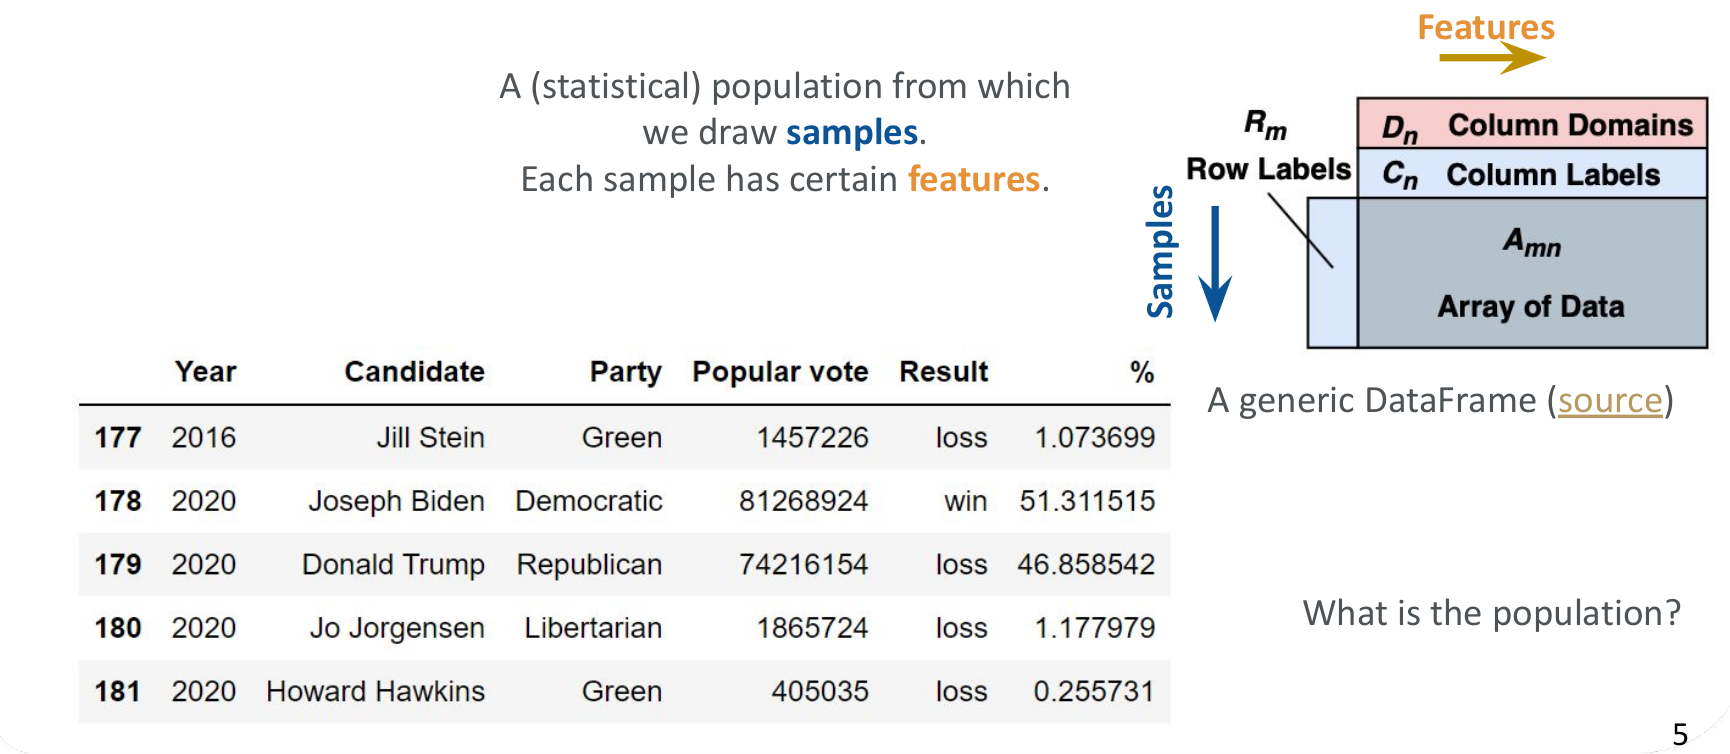

In [31]:
show_image('./slides/slide05.png', 800, 350)

The Pandas library has a lot of “syntactic sugar”. For example, we can also use the ``head`` command to return only a few rows of a dataframe.

In [6]:
# elections.tail(5) # tail command to get the last so many rows.
elections.head()

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


---
## Indexing into Data
### The `.loc` operator
``loc`` selects items by row and column label.

As a simple indexing example using the ``loc`` operator, consider the code below which returns the first 5 rows of the DataFrame.  



In [ ]:
elections.loc[0:4]

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


If we want a subset of the columns, we can also use ``loc`` just to ask for those.

In [ ]:
elections.loc[0:4, "Year":"Party"]

,Year,Candidate,Party
0,1824,Andrew Jackson,Democratic-Republican
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican
4,1832,Andrew Jackson,Democratic


In [35]:
# Using *list* of column and row labels
elections.loc[[87, 25, 179], ["Year", "Candidate", "Result"]]

,Year,Candidate,Result
87,1932,Herbert Hoover,loss
25,1860,John C. Breckinridge,loss
179,2020,Donald Trump,loss


In [34]:
# Using a *slice* (syntax is inclusive of the right hand side of slice
elections.loc[[87, 25, 179], "Popular vote":"%"]

,Popular vote,Result,%
87,15761254,loss,39.830594
25,848019,loss,18.138998
179,74216154,loss,46.858542


In [36]:
# Using a *single value*
elections.loc[[87, 25, 179], "Popular vote"]

87     15761254
25       848019
179    74216154
Name: Popular vote, dtype: int64

In [ ]:
type(elections.loc[[87, 25, 179], "Popular vote"])

pandas.core.series.Series

In [37]:
# Omit the second row if you want all columns
# Use the : (full slice) if you want all rows
elections.loc[:, ["Year", "Candidate", "Result"]]

,Year,Candidate,Result
0,1824,Andrew Jackson,loss
1,1824,John Quincy Adams,win
2,1828,Andrew Jackson,win
3,1828,John Quincy Adams,loss
4,1832,Andrew Jackson,win
...,...,...,...
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss


---
### The `iloc` operator

``iloc`` selects items by row and column number.

In [ ]:
elections.iloc[[1, 2, 3], [0, 1, 2]]

,Year,Candidate,Party
1,1824,John Quincy Adams,Democratic-Republican
2,1828,Andrew Jackson,Democratic
3,1828,John Quincy Adams,National Republican


In [ ]:
elections.iloc[[1, 2, 3], 0:2]

,Year,Candidate
1,1824,John Quincy Adams
2,1828,Andrew Jackson
3,1828,John Quincy Adams


In [ ]:
elections.iloc[[1, 2, 3], 1]

1    John Quincy Adams
2       Andrew Jackson
3    John Quincy Adams
Name: Candidate, dtype: object

In [ ]:
elections.iloc[:, [0, 1, 4]]

,Year,Candidate,Result
0,1824,Andrew Jackson,loss
1,1824,John Quincy Adams,win
2,1828,Andrew Jackson,win
3,1828,John Quincy Adams,loss
4,1832,Andrew Jackson,win
...,...,...,...
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss


---
### The `[]` operator

We could technically do anything we want using `.loc` or `.iloc`. However, in practice, the `[]` operator is often used instead to yield more concise code.

`[]` is a bit trickier to understand than `.loc` or `.iloc`, but it does essentially the same thing.

If we provide a slice of row numbers, we get the numbered rows.

In [ ]:
elections[3:7]

,Year,Candidate,Party,Popular vote,Result,%
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
5,1832,Henry Clay,National Republican,484205,loss,37.603628
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583


If we provide a list of column names, we get the listed columns.

In [ ]:
elections[["Year", "Candidate", "Result"]].tail(5)

,Year,Candidate,Result
177,2016,Jill Stein,loss
178,2020,Joseph Biden,win
179,2020,Donald Trump,loss
180,2020,Jo Jorgensen,loss
181,2020,Howard Hawkins,loss


And if we provide a single column name we get back just that column.

In [ ]:
elections["Candidate"].tail(5)

177        Jill Stein
178      Joseph Biden
179      Donald Trump
180      Jo Jorgensen
181    Howard Hawkins
Name: Candidate, dtype: object

In [ ]:
weird = pd.DataFrame({
    1:["topdog","botdog"],
    "1":["topcat","botcat"]
})
weird

,1,1
0,topdog,topcat
1,botdog,botcat


In [ ]:
weird[1] #try to predict the output

0    topdog
1    botdog
Name: 1, dtype: object

In [ ]:
weird["1"] #try to predict the output

0    topcat
1    botcat
Name: 1, dtype: object

In [ ]:
weird[1:] #try to predict the output

,1,1
1,botdog,botcat


---
## Pandas Datastructures: DataFrames, Series, and Indices

In [ ]:
type(elections)

pandas.core.frame.DataFrame

In [ ]:
type(elections["Candidate"])

pandas.core.series.Series

In [ ]:
mottos = pd.read_csv("./data/mottos.csv", index_col = "State")
mottos.loc["Alabama":"California"]

,Motto,Translation,Language,Date Adopted
State,,,,
Alabama,Audemus jura nostra defendere,We dare defend our rights!,Latin,1923
Alaska,North to the future,—,English,1967
Arizona,Ditat Deus,God enriches,Latin,1863
Arkansas,Regnat populus,The people rule,Latin,1907
California,Eureka (Εὕρηκα),I have found it,Greek,1849


In [ ]:
elections["Candidate"].tail(5).to_frame()

,Candidate
177,Jill Stein
178,Joseph Biden
179,Donald Trump
180,Jo Jorgensen
181,Howard Hawkins


In [ ]:
elections[["Candidate"]].tail(5)

,Candidate
177,Jill Stein
178,Joseph Biden
179,Donald Trump
180,Jo Jorgensen
181,Howard Hawkins


In [ ]:
mottos.index

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [ ]:
mottos.columns

Index(['Motto', 'Translation', 'Language', 'Date Adopted'], dtype='object')

## Conditional Selection

In [ ]:
elections[elections["Party"] == "Independent"]

,Year,Candidate,Party,Popular vote,Result,%
121,1976,Eugene McCarthy,Independent,740460,loss,0.911649
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


In [ ]:
elections["Party"] == "Independent"

0      False
1      False
2      False
3      False
4      False
       ...  
177    False
178    False
179    False
180    False
181    False
Name: Party, Length: 182, dtype: bool

Boolean array selection also works with `loc`!

In [ ]:
elections.loc[elections["Party"] == "Independent"]

,Year,Candidate,Party,Popular vote,Result,%
121,1976,Eugene McCarthy,Independent,740460,loss,0.911649
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
143,1992,Ross Perot,Independent,19743821,loss,18.956298
161,2004,Ralph Nader,Independent,465151,loss,0.380663
167,2008,Ralph Nader,Independent,739034,loss,0.563842
174,2016,Evan McMullin,Independent,732273,loss,0.539546


In [ ]:
elections[(elections["Result"] == "win") & (elections["%"] < 47)]

,Year,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
20,1856,James Buchanan,Democratic,1835140,win,45.306080
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
47,1892,Grover Cleveland,Democratic,5553898,win,46.121393
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
117,1968,Richard Nixon,Republican,31783783,win,43.565246
140,1992,Bill Clinton,Democratic,44909806,win,43.118485
173,2016,Donald Trump,Republican,62984828,win,46.407862


In [ ]:
elections[[1]*len(elections)]

KeyError: "None of [Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,\n            ...\n            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],\n           dtype='int64', length=182)] are in the [columns]"

In [ ]:
elections2 = elections[(elections["Year"] == 1980) | (elections["Year"] == 1984) | (elections["Year"] == 1988)]
elections2

,Year,Candidate,Party,Popular vote,Result,%
127,1980,Barry Commoner,Citizens,233052,loss,0.270182
128,1980,Ed Clark,Libertarian,921128,loss,1.067883
129,1980,Jimmy Carter,Democratic,35480115,loss,41.132848
130,1980,John B. Anderson,Independent,5719850,loss,6.631143
131,1980,Ronald Reagan,Republican,43903230,win,50.897944
132,1984,David Bergland,Libertarian,228111,loss,0.247245
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
134,1984,Walter Mondale,Democratic,37577352,loss,40.729429
135,1988,George H. W. Bush,Republican,48886597,win,53.518845
136,1988,Lenora Fulani,New Alliance,217221,loss,0.237804


In [ ]:
(
    elections[(elections["Party"] == "Anti-Masonic")  |
              (elections["Party"] == "American")      |
              (elections["Party"] == "Anti-Monopoly") |
              (elections["Party"] == "American Independent")]
)
#Note: The parentheses surrounding the code make it possible to break the code on to multiple lines for readability

,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
22,1856,Millard Fillmore,American,873053,loss,21.554001
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


In [ ]:
a_parties = ["Anti-Masonic", "American", "Anti-Monopoly", "American Independent"]
elections[elections["Party"].isin(a_parties)]

,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
22,1856,Millard Fillmore,American,873053,loss,21.554001
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


In [ ]:
elections[elections["Party"].str.startswith("A")]

,Year,Candidate,Party,Popular vote,Result,%
6,1832,William Wirt,Anti-Masonic,100715,loss,7.821583
22,1856,Millard Fillmore,American,873053,loss,21.554001
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838
115,1968,George Wallace,American Independent,9901118,loss,13.571218
119,1972,John G. Schmitz,American Independent,1100868,loss,1.421524
124,1976,Lester Maddox,American Independent,170274,loss,0.209640
126,1976,Thomas J. Anderson,American,158271,loss,0.194862


In [ ]:
elections.query('Year >= 2000 and Result == "win"')

,Year,Candidate,Party,Popular vote,Result,%
152,2000,George W. Bush,Republican,50456002,win,47.974666
157,2004,George W. Bush,Republican,62040610,win,50.771824
162,2008,Barack Obama,Democratic,69498516,win,53.023510
168,2012,Barack Obama,Democratic,65915795,win,51.258484
173,2016,Donald Trump,Republican,62984828,win,46.407862
178,2020,Joseph Biden,Democratic,81268924,win,51.311515


In [ ]:
parties = ["Republican", "Democratic"]
elections.query('Result == "win" and Party not in @parties')

,Year,Candidate,Party,Popular vote,Result,%
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
11,1840,William Henry Harrison,Whig,1275583,win,53.051213
16,1848,Zachary Taylor,Whig,1360235,win,47.309296
27,1864,Abraham Lincoln,National Union,2211317,win,54.951512


## Built In Functions

In [ ]:
winners = elections.query('Result == "win"')["%"]
winners.head(5)

1     42.789878
2     56.203927
4     54.574789
8     52.272472
11    53.051213
Name: %, dtype: float64

In [ ]:
np.mean(winners)

51.711492939

In [ ]:
max(winners)

61.34470329

In [ ]:
elections

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789
...,...,...,...,...,...,...
177,2016,Jill Stein,Green,1457226,loss,1.073699
178,2020,Joseph Biden,Democratic,81268924,win,51.311515
179,2020,Donald Trump,Republican,74216154,loss,46.858542
180,2020,Jo Jorgensen,Libertarian,1865724,loss,1.177979


In [ ]:
elections.size

1092

In [ ]:
elections.shape

(182, 6)

In [ ]:
elections.describe()

,Year,Popular vote,%
count,182.000000,1.820000e+02,182.000000
mean,1934.087912,1.235364e+07,27.470350
std,57.048908,1.907715e+07,22.968034
min,1824.000000,1.007150e+05,0.098088
25%,1889.000000,3.876395e+05,1.219996
50%,1936.000000,1.709375e+06,37.677893
75%,1988.000000,1.897775e+07,48.354977
max,2020.000000,8.126892e+07,61.344703


In [ ]:
elections.sample(5).iloc[:, 0:2]

,Year,Candidate
181,2020,Howard Hawkins
180,2020,Jo Jorgensen
112,1960,Richard Nixon
12,1844,Henry Clay
119,1972,John G. Schmitz


In [ ]:
elections.query('Year == 2000').sample(4, replace = True).iloc[:, 0:2]

,Year,Candidate
154,2000,Pat Buchanan
151,2000,Al Gore
155,2000,Ralph Nader
152,2000,George W. Bush


In [ ]:
elections["Candidate"].value_counts()

Norman Thomas         5
Ralph Nader           4
Franklin Roosevelt    4
Eugene V. Debs        4
Andrew Jackson        3
                     ..
Silas C. Swallow      1
Alton B. Parker       1
John G. Woolley       1
Joshua Levering       1
Howard Hawkins        1
Name: Candidate, Length: 132, dtype: int64

In [ ]:
elections["Party"].unique()

array(['Democratic-Republican', 'Democratic', 'National Republican',
       'Anti-Masonic', 'Whig', 'Free Soil', 'Republican', 'American',
       'Constitutional Union', 'Southern Democratic',
       'Northern Democratic', 'National Union', 'Liberal Republican',
       'Greenback', 'Anti-Monopoly', 'Prohibition', 'Union Labor',
       'Populist', 'National Democratic', 'Socialist', 'Progressive',
       'Farmer–Labor', 'Communist', 'Union', 'Dixiecrat',
       "States' Rights", 'American Independent', 'Independent',
       'Libertarian', 'Citizens', 'New Alliance', 'Taxpayers',
       'Natural Law', 'Green', 'Reform', 'Constitution'], dtype=object)

In [ ]:
elections["Candidate"].sort_values()

75           Aaron S. Watkins
27            Abraham Lincoln
23            Abraham Lincoln
108           Adlai Stevenson
105           Adlai Stevenson
                ...          
19             Winfield Scott
37     Winfield Scott Hancock
74             Woodrow Wilson
70             Woodrow Wilson
16             Zachary Taylor
Name: Candidate, Length: 182, dtype: object

In [ ]:
elections.sort_values("%", ascending = False)

,Year,Candidate,Party,Popular vote,Result,%
114,1964,Lyndon Johnson,Democratic,43127041,win,61.344703
91,1936,Franklin Roosevelt,Democratic,27752648,win,60.978107
120,1972,Richard Nixon,Republican,47168710,win,60.907806
79,1920,Warren Harding,Republican,16144093,win,60.574501
133,1984,Ronald Reagan,Republican,54455472,win,59.023326
...,...,...,...,...,...,...
165,2008,Cynthia McKinney,Green,161797,loss,0.123442
148,1996,John Hagelin,Natural Law,113670,loss,0.118219
160,2004,Michael Peroutka,Constitution,143630,loss,0.117542
141,1992,Bo Gritz,Populist,106152,loss,0.101918


## Chained indexing
The flexibility of pandas allows for chained indexing, where you can repeatedly index the outcome of a previous indexing operation. [Source](https://towardsdatascience.com/settingwithcopywarning-in-pandas-782e4aa54ff7)

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "A": [1, 2, 3, 4, 5],
    "B": [6, 7, 8, 9, 10],
    }, index=range(5)
    )
df

,A,B
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [ ]:
# Example of causing a Pandas chained assignment warning
dfa = df.loc[3:5]
dfa["C"] = dfa["B"] * 50

/tmp/ipykernel_359/914266719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa["C"] = dfa["B"] * 50


In [ ]:
print(dfa)
print(df)

   A   B    C
3  4   9  450
4  5  10  500
   A   B
0  1   6
1  2   7
2  3   8
3  4   9
4  5  10


Note:
* The value assignment did occur.
* Did you expect the contents of `df` to be affected by the value assignment in dfa?
* Pandas has internally consistent (albeit obtuse) rules on whether that happens or not. It’s just that the ambiguity in user expectations present in this situation warrants a warning, so that end users like you and me know where to look when our code misbehaves.

When indexing and selecting data Pandas will return either a __view__ or a __copy__ of a dataframe. A view (shallow copy) references data from the original dataframe, while a copy (deep copy) is a separate instance of the same data.

It is difficult to predict which will be returned by the indexing operation, as it depends on the memory layout of the underlying array. How exactly the indexing is chained can lead to different `__getitem__` and `__setitem__` calls being issued under the hood. Let's consider the following example: [Source](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy)

In [ ]:
dfmi = pd.DataFrame([list('abcd'),
                     list('efgh'),
                     list('ijkl'),
                     list('mnop')],
                    columns=pd.MultiIndex.from_product([['one', 'two'],
                                                        ['first', 'second']]))
dfmi

one          two       
  first second first second
0     a      b     c      d
1     e      f     g      h
2     i      j     k      l
3     m      n     o      p

In [ ]:
dfmi.loc[:, ('one', 'second')] = 'z1'
# becomes
# dfmi.loc.__setitem__((slice(None), (‘one’, ‘second’)), value)
dfmi

one          two       
  first second first second
0     a     z1     c      d
1     e     z1     g      h
2     i     z1     k      l
3     m     z1     o      p

In [ ]:
dfmi['one']['second'] = 'z2'
# becomes
#dfmi.__getitem__(‘one’).__setitem__(‘second’, value)

/tmp/ipykernel_359/1355793736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmi['one']['second'] = 'z2'


In [ ]:
dfmi

one          two       
  first second first second
0     a     z1     c      d
1     e     z1     g      h
2     i     z1     k      l
3     m     z1     o      p

Notice the `__getitem__`? Outside of simple cases, it’s very hard to predict whether it will return a view or a copy (it depends on the memory layout of the array, about which pandas makes no guarantees), and therefore whether the `__setitem__` will modify `dfmi` or a temporary object that gets thrown out immediately afterward. That’s what `SettingWithCopy` is warning you about.

If you need to update multiple items, it is recommended to use `.loc` as access method with a mask.

In [ ]:
dfc = pd.DataFrame({'a': ['one', 'one', 'two',
                          'three', 'two', 'one', 'six'],
                    'c': range(7)})

dfd = dfc.copy()

# Setting multiple items using a mask
mask = dfd['a'].str.startswith('o')

dfd.loc[mask, 'c'] = 42

dfd

,a,c
0,one,42
1,one,42
2,two,2
3,three,3
4,two,4
5,one,42
6,six,6
